In [1]:
import os
import seaborn as sn
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
from gridmix import GridMixupLoss

### Helper function for vizualization

In [2]:
def visualize_batch(images, labels):
    plt.figure(figsize=(10, 6))
    for ind, image in enumerate(images):
        plt.subplot(2, 2, ind + 1)
        plt.imshow(image)  
        plt.axis("off")
    plt.show()

### Make list of images

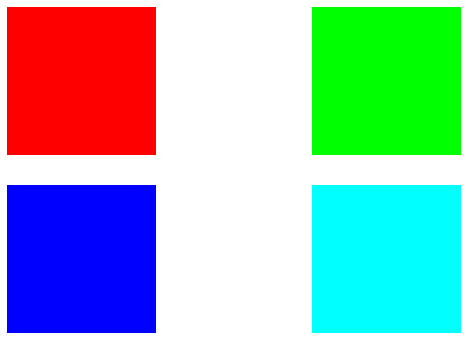

In [3]:
images = [
    np.ones(shape=(256, 256, 3), dtype=np.uint8) * [255, 0, 0],
    np.ones(shape=(256, 256, 3), dtype=np.uint8) * [0, 255, 0],
    np.ones(shape=(256, 256, 3), dtype=np.uint8) * [0, 0, 255],
    np.ones(shape=(256, 256, 3), dtype=np.uint8) * [0, 255, 255]
]
visualize_batch(images, labels=0)

### Convert images to torch.Tensor

In [4]:
targets = torch.cat([torch.Tensor([1]), torch.Tensor([2]), torch.Tensor([3]), torch.Tensor([4])]).unsqueeze(-1)
images_batch = torch.cat(
    [torch.from_numpy(np.moveaxis(image, -1, 0)).unsqueeze(0) for image in images],
    dim=0
)

### Apply GridMixup transformation

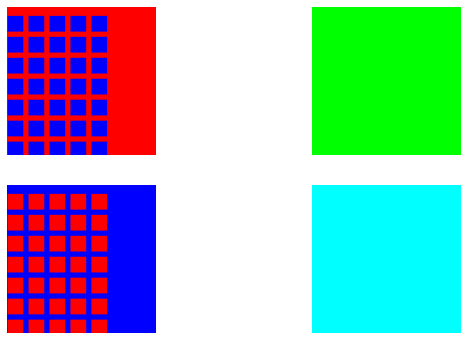

In [5]:
gridmix_cls = GridMixupLoss(
    alpha=(0.4, 0.7),
    hole_aspect_ratio=1.,
    crop_area_ratio=(0.5, 1),
    crop_aspect_ratio=(0.5, 2),
    n_holes_x=(2, 6)
)
mixed_images_batch, mixed_targets = gridmix_cls.get_sample(images=images_batch, targets=targets)
mixed_images = np.moveaxis(mixed_images_batch.data.cpu().numpy(), 1, -1)
visualize_batch(images=mixed_images, labels=0)


